# Случайность в вероятности и на практике

О подходах к понятию случайности: 

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf

## Генераторы случайных чисел

Что происходит при вызове, напрмер, ```np.random.rand()```?

Как устроен источник случайной последовательности?

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции ```rand()``` в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

In [ ]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать наобум, это может привести к неожиданным последствиям:

In [ ]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма распределения похожа на равномерное:

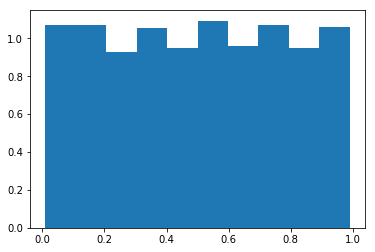

In [ ]:
import matplotlib.pyplot as plt
plt.hist(random, normed=True)
plt.show()

Однако, спектральный тест показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с предствалением о случайности:

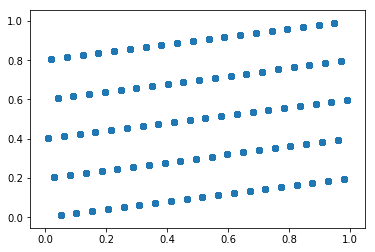

In [ ]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более аккуратный выбор параметров приводит с более "случайному" распределению:

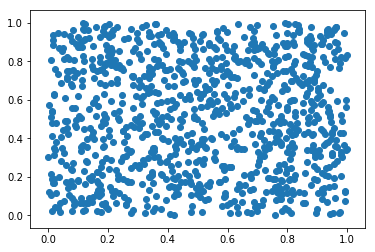

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации собрано [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

Сюжет про динамические системы и переход к хаосу https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


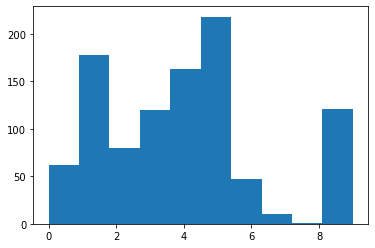

time for an unsorted array: 0.00042819976806640625


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

arr=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

start=time.time()
arr/=arr.sum()
arr= arr.cumsum()
rnd=np.random.rand(1000)
random = np.searchsorted(arr, rnd)
end=time.time()

plt.hist(random)
plt.show()
print('time for an unsorted array:', end - start)

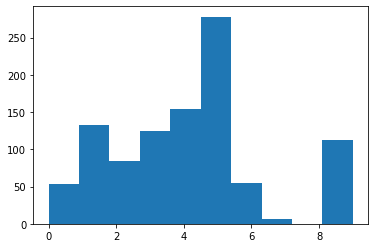

time for a sorted array: 0.0002810955047607422


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

arr=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

start=time.time()
arr_1 = np.sort(arr)
arr_1 /= arr_1.sum()
arr_1 = arr_1.cumsum()
rnd = np.random.rand(1000)
random = np.argsort(arr)[np.searchsorted(arr_1, rnd)]
end=time.time()
plt.hist(random)
plt.show()
print('time for a sorted array:', end - start)

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

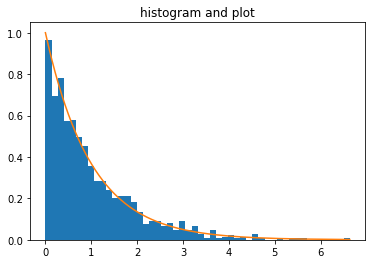

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp


fig, ax=plt.subplots()
lambdaa=1

rnd = np.random.rand(1000)
rnd.sort()

distrib=[-1 /lambdaa*np.log(1 - rnd[i]) for i in range(1000)]
plt.hist(distrib, bins=50, density=True)

plo = [lambdaa*exp(-lambdaa*distrib[i]) for i in range(1000)]
plt.title("histogram and plot")
plt.plot(distrib, plo)
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

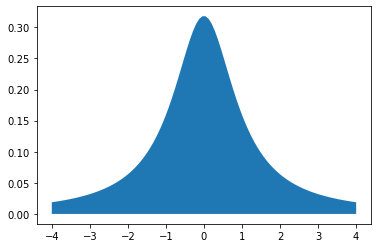

In [32]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

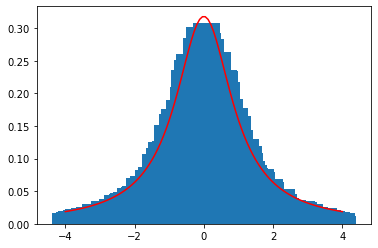

In [38]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

def rndd():
    a = [0,0]
    a[1] = 1/math.pi*np.random.rand()
    if np.random.rand()>0.5:
      a[0] = 4*np.random.rand()
    else: a[0] = -4*np.random.rand()
    while a[1]>1/(math.pi*(1+a[0]*a[0])):
       a[1] = 1/math.pi*np.random.rand()
    return a
rndm = [rndd() for i in range(1000)]
rndm_x = [rndm[i][0] for i in range(1000)]
rndm_y = [rndm[i][1] for i in range(1000)]


x = np.linspace(-4, 4, 100)
D = stats.cauchy()

plt.bar(rndm_x, rndm_y)
plt.plot(x, D.pdf(x), color='r')
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

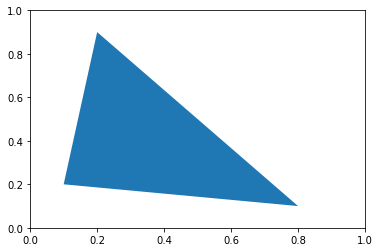

In [39]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

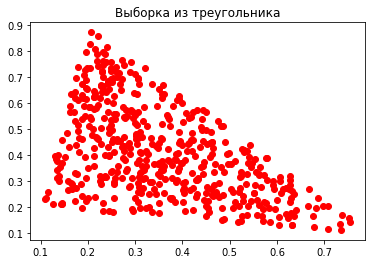

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

rndm_x=np.array([np.random.rand() for i in range(500)])
rndm_y=np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if rndm_y[i]>-rndm_x[i]+1:
        rndm_x[i]=-rndm_x[i]+1
        rndm_y[i]=-rndm_y[i]+1
        
rndm_x*=math.hypot(0.7, 0.1)
rndm_y*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = rndm_x
y = rndm_y
rndm_x = x*math.cos(a)-y*math.sin(a)+0.1
rndm_y = x*math.sin(a)+y*math.cos(a)+0.2

#plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(rndm_x, rndm_y,c='r')
plt.title("Выборка из треугольника")
plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

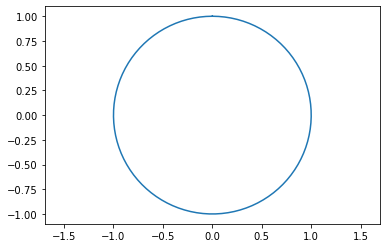

In [44]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

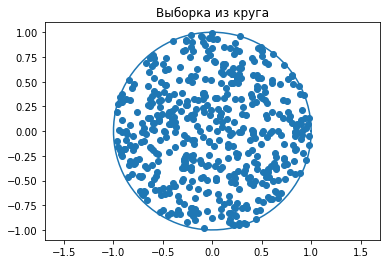

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Circle

def rndm_circle():
  a=np.array([np.random.rand(),np.random.rand()])
  r=a[1]
  fi=a[0]*2*math.pi
  a[0]=r**0.5*math.cos(fi)
  a[1]=r**0.5*math.sin(fi)
  return a
rndm = [rndm_circle() for i in range(500)]
rndm_x = [rndm[i][0] for i in range(500)]
rndm_y = [rndm[i][1] for i in range(500)]
t=np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(t), np.sin(t))
plt.axis('equal')
plt.title("Выборка из круга")
plt.scatter(rndm_x, rndm_y)

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

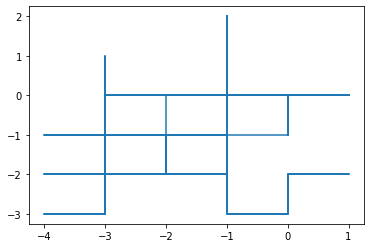

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

x1=np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
y1=np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
x2 =np.full(100, 1)
x2[-x1]=-1
y2=np.full(100, 1)
y2[-y1] = -1
x2=x2.cumsum()
y2=y2.cumsum()
x=(x2+y2)/2
y=(x2-y2)/2

np.insert(x, 0, 0)
np.insert(y, 0, 0)
plt.plot(x, y)
plt.show()


## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

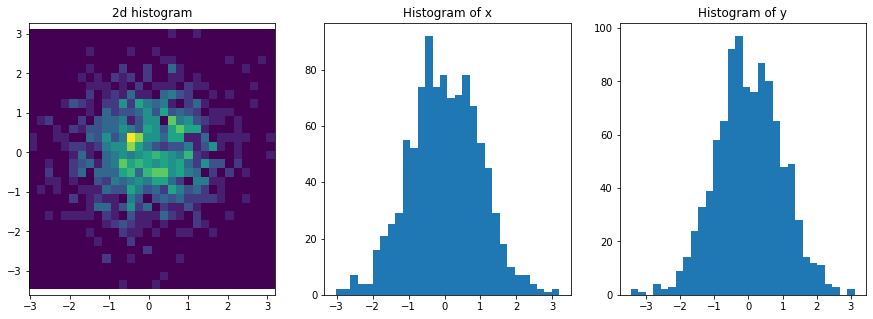

In [74]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

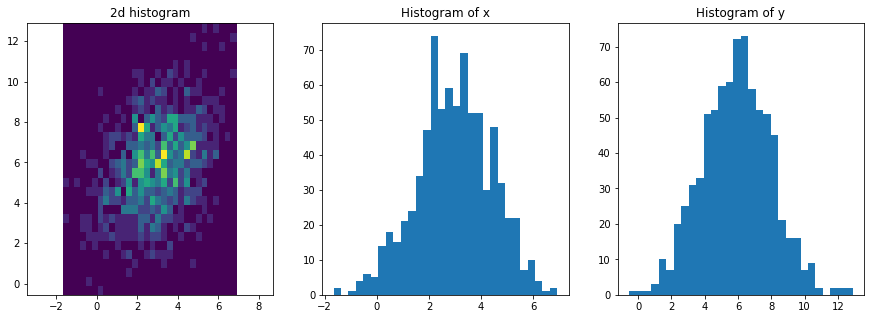

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

n = 0
x = []
y = []
while(n < 1000):
    u = random.uniform(-1, 1)
    t = random.uniform(-1, 1)
    s = u*u+t*t
    if(s > 0 and s <= 1):
        x.append(u * math.sqrt(-2 * math.log(s) / s))
        y.append(t * math.sqrt(-2 * math.log(s) / s))
    n = n + 1
x = np.array(x)
y = np.array(y)
y *= math.sqrt(7 / 2)
y += 1 / math.sqrt(2) * x
x *= math.sqrt(2)
x += 3
y += 6
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

### Задача
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.


In [8]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

Переход производится с помощью метода Холецкого. В матрице B девятая строка равна минус сумме первой и пятой, поэтому в матрице L сделаем девятую строку, равной минус сумме первой и пятой. Проверка показывает, что L*L^T=B. Получим преобразование исходных восьми величин. 

In [19]:
def norm(n):
    a = np.zeros(8*n).reshape(8,n)
    for i in range (8):
        a[i] = np.random.normal(0,1,n)
    return a
m = multinorm(1)
L = np.linalg.cholesky(B[np.arange(8)][:,np.arange(8)])
a = L.dot(m)+1
a_8 = np.zeros(9)
for i in range (8):
    a_8[i] = a[i]
a_8[8] = -(a[0]+a[4])
print(a_8)

[ 1.19771688  0.98354267 -0.88731116  1.73813863  0.48153553  2.99889396
 -0.37070539 -1.5083468  -1.67925241]


### Задача
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число $\pi$. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число $\pi$ с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


In [ ]:
# Solution here

### Задача

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
# Solution here